In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data import make_rectangle, insert_shape, plot_data
from agent import Agent
from optim import cas_train_cbf, hjoint
from utils import plot_cbf

%load_ext autoreload
%autoreload 2

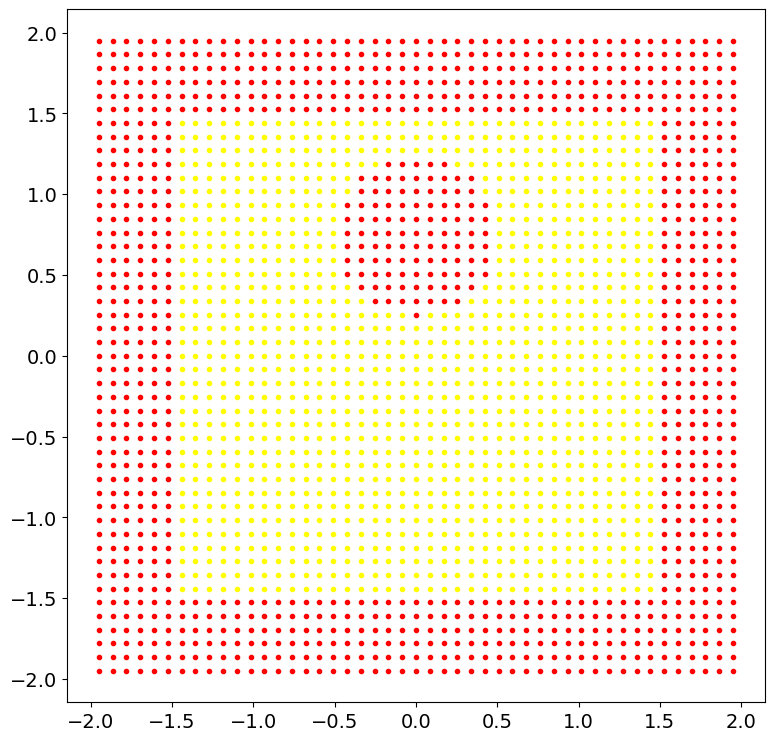

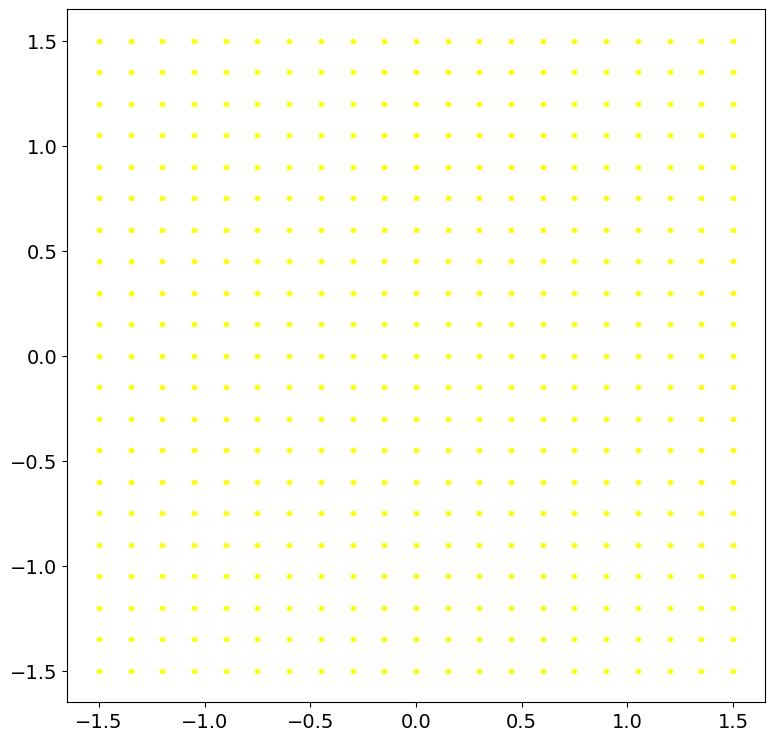

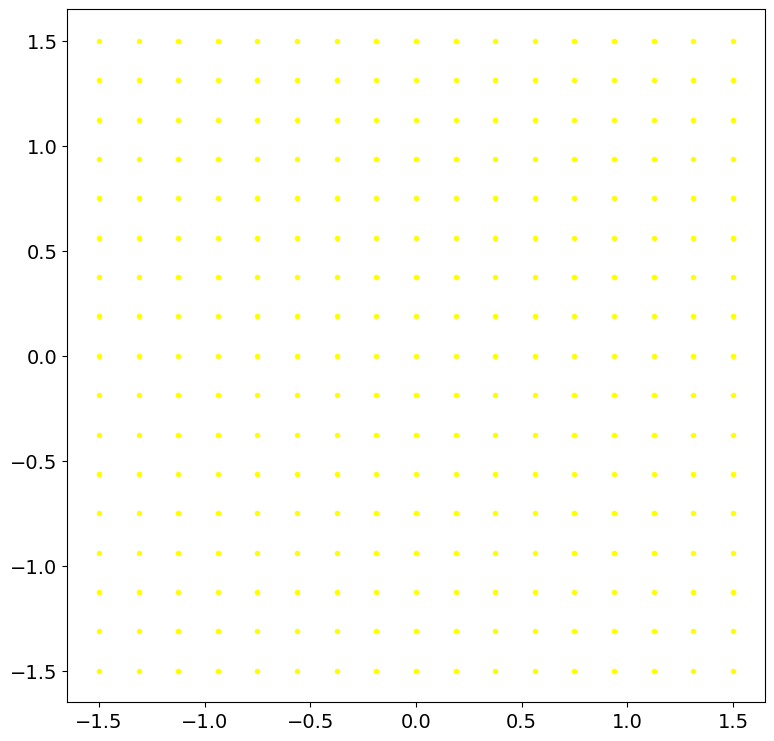

In [2]:
width=3
grid, obs_dict = make_rectangle(height=width, width=width, density=150, unsafe_margin=0.3, center=(0,0))
#obs_dict = insert_shape(np.array([-0.2, 2.3]), grid, obs_dict, shape='triangle', scale=3.2, theta=-np.pi/8)
obs_dict = insert_shape(np.array([0, 0.75]), grid, obs_dict, shape='circle', scale=0.5, theta=0)
c_grid, c_obs_dict = make_rectangle(height=width, width=width, density=50, unsafe_margin=0, center=(0,0))
s_grid, s_obs_dict = make_rectangle(height=width, width=width, density=35 , unsafe_margin=0, center=(0,0))
plot_data(grid, obs_dict)
plot_data(c_grid, c_obs_dict)
plot_data(s_grid, s_obs_dict)

In [3]:
a = Agent((0, 0), grid, obs_dict, width=width, sensor_radius=1)

scan_safe, scan_unsafe = a.scan()
rx = 1.5
samples  = a.sample(rx, grid=s_grid)

if scan_unsafe.shape[0] != 0:
    x_unsafe = np.vstack((scan_unsafe, samples))
else: 
    x_unsafe = samples

n_safe = scan_safe.shape[0]
x_buffer, x_safe = a.make_buffer(scan_safe, int(0.2 * n_safe), 0.50)

rc = 1
C = []
for x in c_grid:
    if np.linalg.norm(x - a.pos) <= rc:
        C.append(x)
C = np.array(C)
a.centers.append(C)

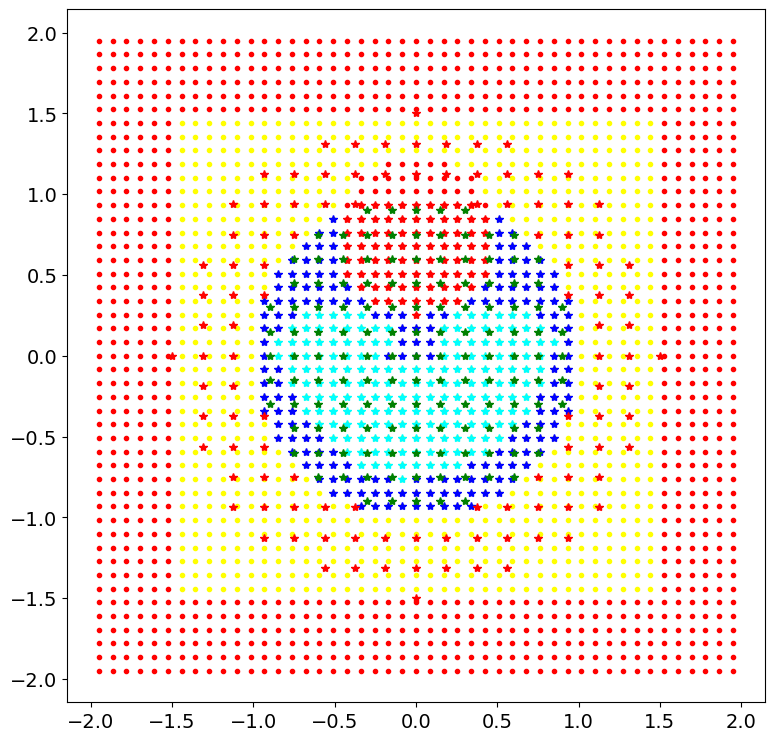

In [4]:
plot_data(grid, obs_dict, [(x_safe  , "cyan"), 
                           (x_buffer, "blue"), 
                           (x_unsafe, "red"),
                           (C       , "green")])

In [5]:
theta_max=10
max_elem =100
gamma_safe=0.3
gamma_unsafe=-0.3
gamma_dyn=0.1
theta=cas_train_cbf(x_safe, x_buffer, x_unsafe, C, theta_max, max_elem, rx, rc, gamma_safe, gamma_unsafe, gamma_dyn)
a.thetas.append(theta)

1.3443213901444846
CasADi - 2024-03-26 16:41:11 MESSAGE("nlp::init") [.../casadi/core/function_internal.cpp:547]
CasADi - 2024-03-26 16:41:11 MESSAGE("nlp::init") [.../casadi/core/x_function.hpp:327]
CasADi - 2024-03-26 16:41:11 MESSAGE("nlp::init") [.../casadi/core/mx_function.cpp:113]
CasADi - 2024-03-26 16:41:11 MESSAGE("Using live variables: work array is 7 instead of 7531") [.../casadi/core/mx_function.cpp:326]
CasADi - 2024-03-26 16:41:12 MESSAGE("solver::init") [.../casadi/core/function_internal.cpp:547]
CasADi - 2024-03-26 16:41:12 MESSAGE("solver::create_function nlp_grad:[x, p, lam:f, lam:g]->[f, g, grad:gamma:x, grad:gamma:p]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:41:12 MESSAGE("solver::create_function nlp_f:[x, p]->[f]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:41:12 MESSAGE("solver::create_function nlp_g:[x, p]->[g]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:41:12 MESSAGE("solver::create_function n

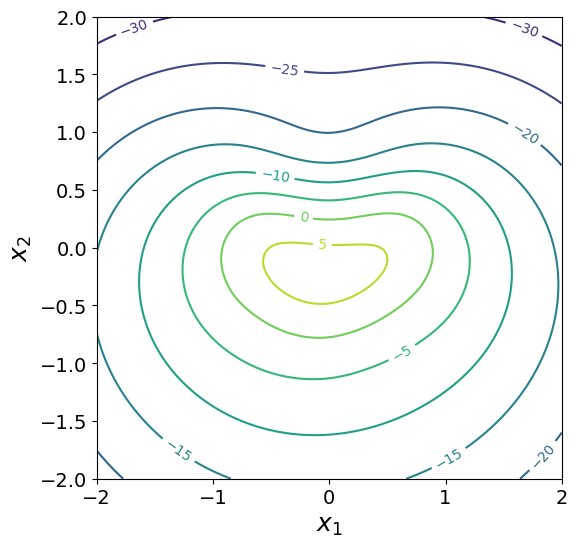

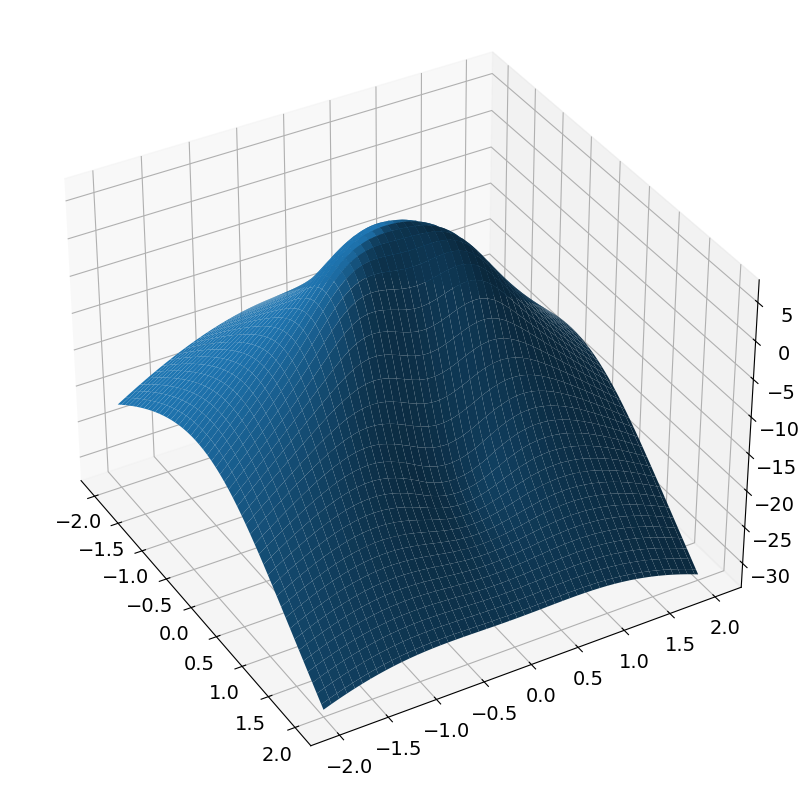

In [6]:
plot_cbf(a.width, a.thetas, a.centers)

In [7]:
pos = 0
neg = 0
for elem in theta:
    if elem < 0:
        neg += elem
    else:
        pos += elem
print(neg/pos)

-1.243944902398445


target: [0.44410248 0.3530277 ]
position is [0 0]
h is [5.38827394]
start time is 0


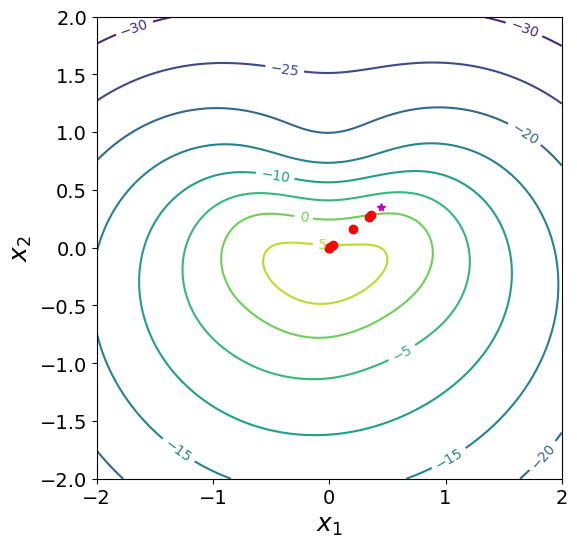

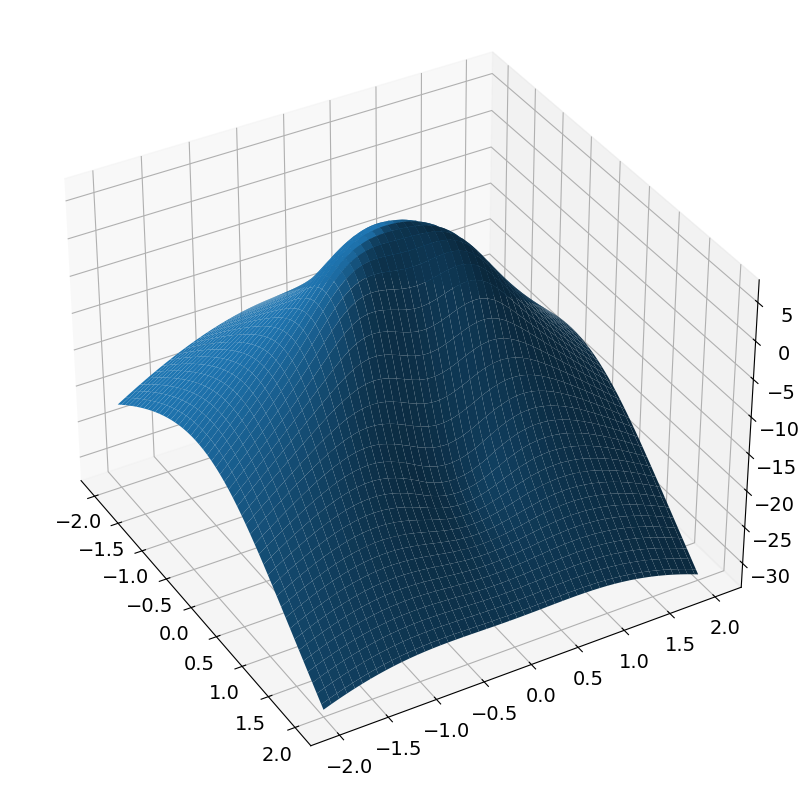

new position is [0.35466149 0.28067285]
h is now [0.1]
new time is 500


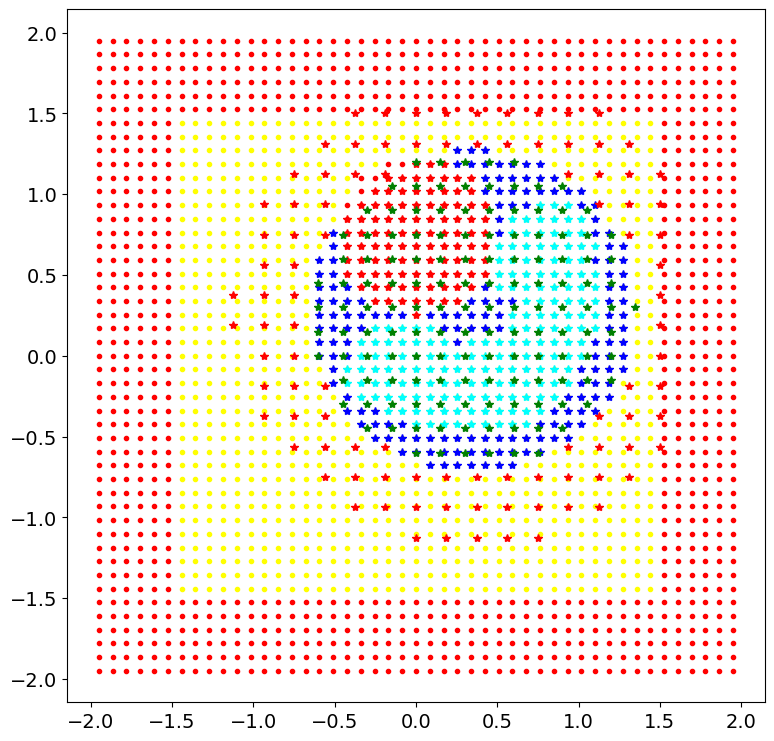

1.3443213901444846
CasADi - 2024-03-26 16:41:56 MESSAGE("nlp::init") [.../casadi/core/function_internal.cpp:547]
CasADi - 2024-03-26 16:41:56 MESSAGE("nlp::init") [.../casadi/core/x_function.hpp:327]
CasADi - 2024-03-26 16:41:56 MESSAGE("nlp::init") [.../casadi/core/mx_function.cpp:113]
CasADi - 2024-03-26 16:41:56 MESSAGE("Using live variables: work array is 7 instead of 7229") [.../casadi/core/mx_function.cpp:326]
CasADi - 2024-03-26 16:41:56 MESSAGE("solver::init") [.../casadi/core/function_internal.cpp:547]
CasADi - 2024-03-26 16:41:56 MESSAGE("solver::create_function nlp_grad:[x, p, lam:f, lam:g]->[f, g, grad:gamma:x, grad:gamma:p]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:41:56 MESSAGE("solver::create_function nlp_f:[x, p]->[f]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:41:56 MESSAGE("solver::create_function nlp_g:[x, p]->[g]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:41:56 MESSAGE("solver::create_function n

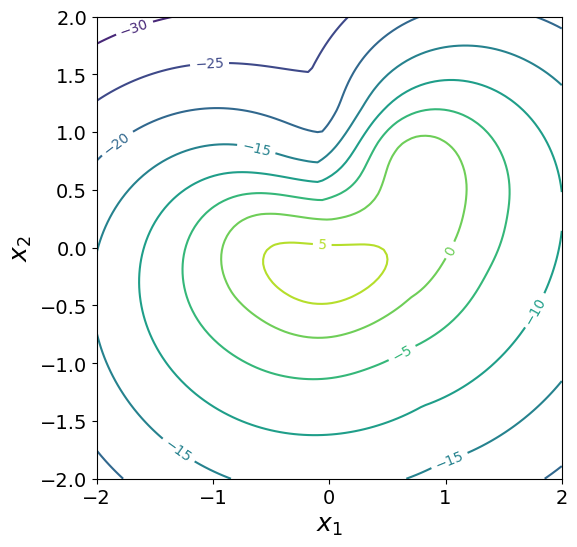

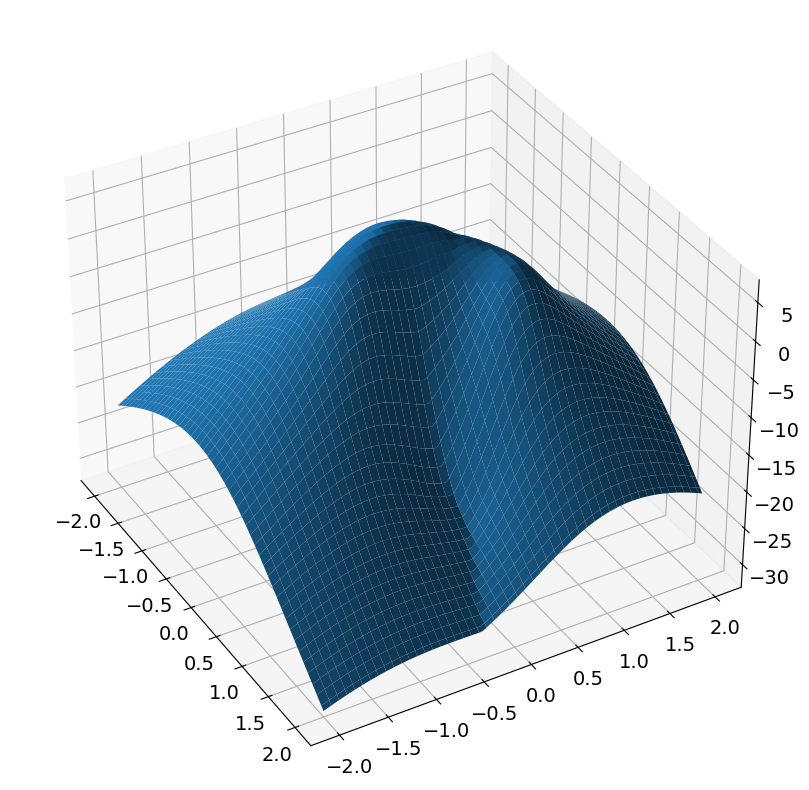

target: [-0.76981221 -0.9770896 ]
position is [0.35466149 0.28067285]
h is [1.42726504]
start time is 500


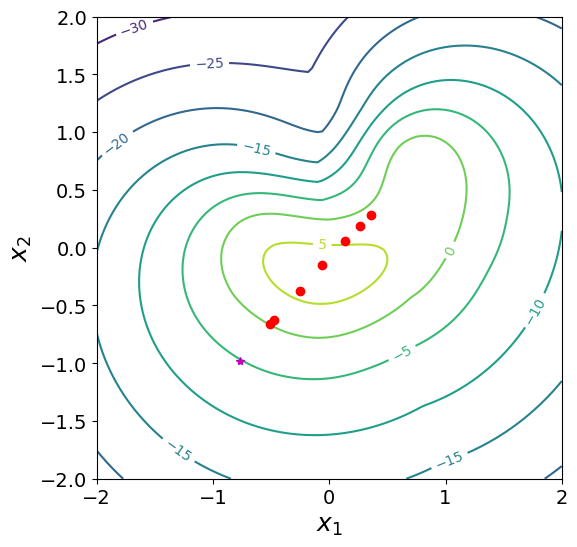

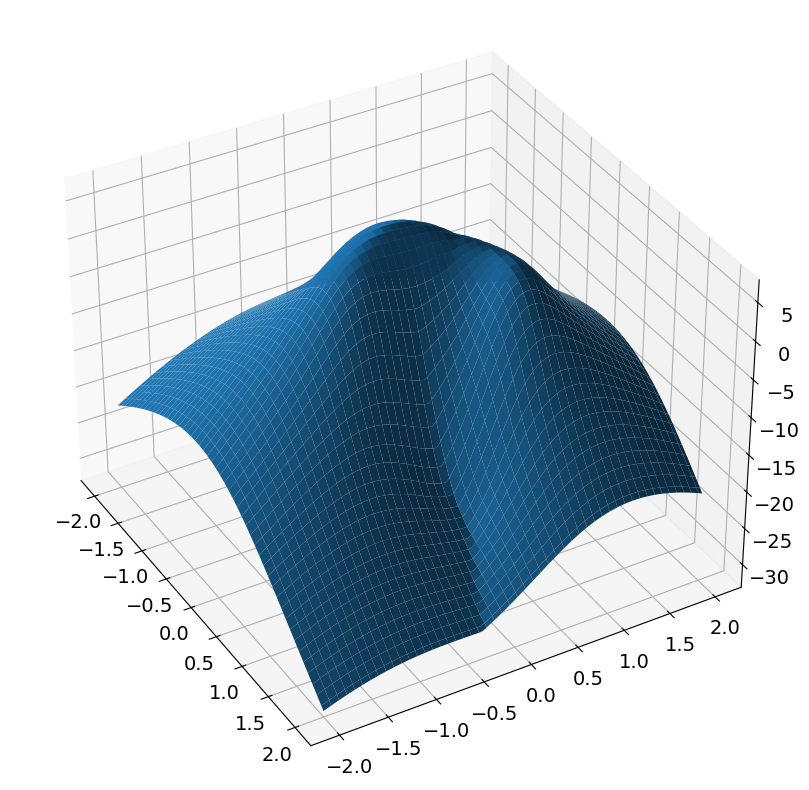

new position is [-0.50956381 -0.66205524]
h is now [0.1]
new time is 1000


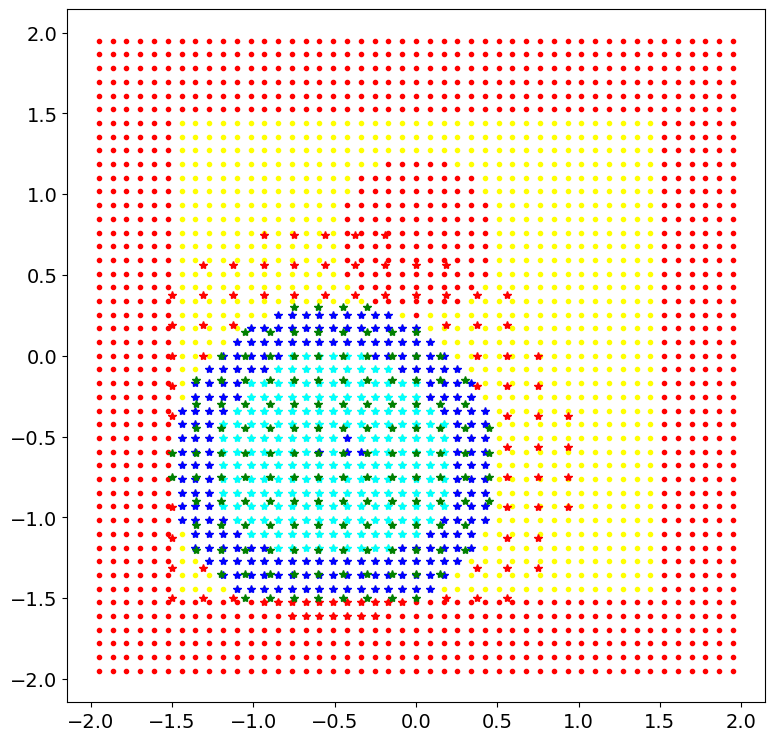

1.3443213901444846
CasADi - 2024-03-26 16:42:46 MESSAGE("nlp::init") [.../casadi/core/function_internal.cpp:547]
CasADi - 2024-03-26 16:42:46 MESSAGE("nlp::init") [.../casadi/core/x_function.hpp:327]
CasADi - 2024-03-26 16:42:46 MESSAGE("nlp::init") [.../casadi/core/mx_function.cpp:113]
CasADi - 2024-03-26 16:42:46 MESSAGE("Using live variables: work array is 7 instead of 8234") [.../casadi/core/mx_function.cpp:326]
CasADi - 2024-03-26 16:42:46 MESSAGE("solver::init") [.../casadi/core/function_internal.cpp:547]
CasADi - 2024-03-26 16:42:46 MESSAGE("solver::create_function nlp_grad:[x, p, lam:f, lam:g]->[f, g, grad:gamma:x, grad:gamma:p]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:42:47 MESSAGE("solver::create_function nlp_f:[x, p]->[f]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:42:47 MESSAGE("solver::create_function nlp_g:[x, p]->[g]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-26 16:42:47 MESSAGE("solver::create_function n

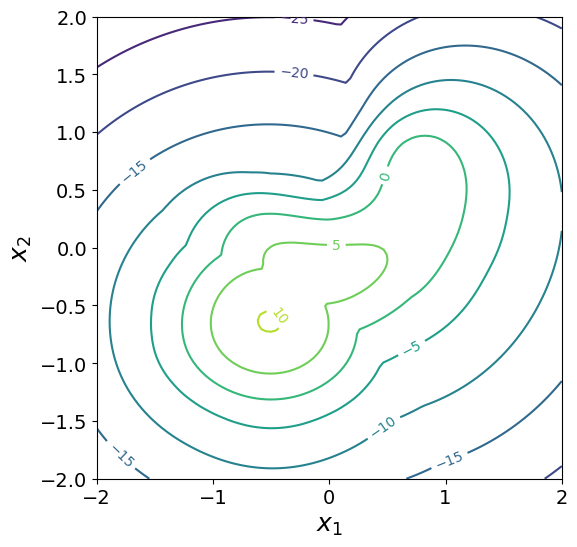

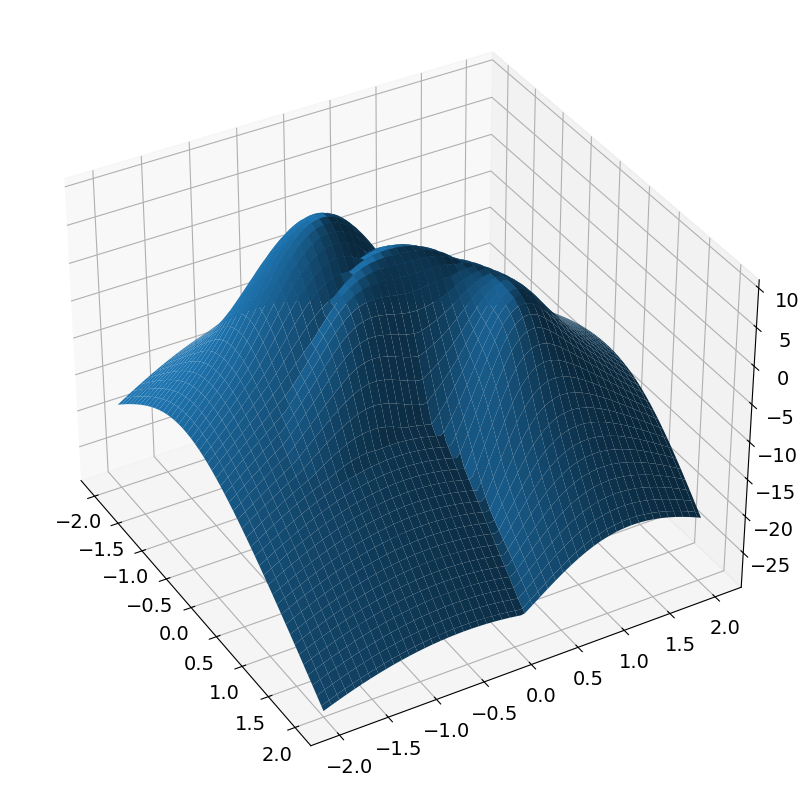

AttributeError: 'builtin_function_or_method' object has no attribute 'rand'

In [8]:
a.pos = np.array([0, 0])
a.t   = 0
tol   = 0.1
for i in range(15):
    target=a.width*np.random.rand(2) - a.width/2
    while hjoint(target, a.thetas, a.centers) > 0:
        target=a.width*np.rand(2) - a.width/2
    print("target:", target)
    first=True
    while hjoint(a.pos, a.thetas, a.centers) >= 2*tol or first:
        a.goto(target, T=2, tend=500, tol=tol)
        first = False
        
    scan_safe, scan_unsafe = a.scan()
    rx = 1.5
    samples  = a.sample(rx, grid=s_grid) 
    if scan_unsafe.shape[0] != 0:
        x_unsafe = np.vstack((scan_unsafe, samples))
    else: 
        x_unsafe = samples 
    n_safe = scan_safe.shape[0]
    x_buffer, x_safe = a.make_buffer(scan_safe, int(0.2 * n_safe), 0.50) 
    rc = 1
    C  = []
    for x in c_grid:
        if np.linalg.norm(x - a.pos) <= rc:
            C.append(x)
    C = np.array(C)
    a.centers.append(C)
    plot_data(grid, obs_dict, [(x_safe  , "cyan"), 
                               (x_buffer, "blue"), 
                               (x_unsafe, "red"),
                               (C       , "green")])
    theta=cas_train_cbf(x_safe, x_buffer, x_unsafe, C, theta_max, max_elem, rx, rc, gamma_safe, gamma_unsafe, gamma_dyn)
    a.thetas.append(theta)
    plot_cbf(a.width, a.thetas, a.centers)